# 08 – Split-Experimente: Vergleich aller Modelle

Vergleicht die Ergebnisse von Baseline, BERT und DistilBERT für verschiedene Split-Strategien:
- 60/20/20 (Train/Val/Test)
- 80/10/10 (Train/Val/Test)

Ziel: Analysieren, wie die Wahl des Splits die Performance beeinflusst.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

PROJECT_ROOT = Path.cwd().parent
results_dir = PROJECT_ROOT / "results"

# Plot-Ordner erstellen
plots_dir = results_dir / "plots"
plots_dir.mkdir(parents=True, exist_ok=True)

## 1) Alle Ergebnisse laden

In [2]:
# Baseline Ergebnisse
baseline_60 = pd.read_csv(results_dir / "baseline_results_60-20-20.csv")
baseline_80 = pd.read_csv(results_dir / "baseline_results_80-10-10.csv")

# BERT Ergebnisse
bert_60 = pd.read_csv(results_dir / "bert_results_60-20-20.csv")
bert_80 = pd.read_csv(results_dir / "bert_results_80-10-10.csv")

# DistilBERT Ergebnisse
distilbert_60 = pd.read_csv(results_dir / "distilbert_results_60-20-20.csv")
distilbert_80 = pd.read_csv(results_dir / "distilbert_results_80-10-10.csv")

# Alle zusammenführen
all_results = pd.concat([
    baseline_60, baseline_80,
    bert_60, bert_80,
    distilbert_60, distilbert_80
], ignore_index=True)

all_results

,model,split,train_size,val_size,test_size,val_accuracy,test_accuracy,test_macro_f1,test_macro_precision,test_macro_recall,best_params,training_time_min,max_len,epochs,learning_rate
0,TF-IDF + LogReg,60-20-20,1335,445,445,0.979775,0.982022,0.982064,0.982204,0.982094,"{'logreg__C': 1.0, 'tfidf__max_features': 3000...",NaN,NaN,NaN,NaN
1,TF-IDF + LogReg,80-10-10,1780,222,223,0.986486,0.991031,0.991178,0.990471,0.992157,"{'logreg__C': 1.0, 'tfidf__max_features': 1000...",NaN,NaN,NaN,NaN
2,BERT (bert-base-uncased),60-20-20,1335,445,445,0.982022,0.977528,0.977132,0.976638,0.977956,NaN,0.64,256.0,3.0,0.00002
3,BERT (bert-base-uncased),80-10-10,1780,222,223,0.986486,0.982063,0.982471,0.981789,0.984314,NaN,0.78,256.0,3.0,0.00002
4,DistilBERT (distilbert-base-uncased),60-20-20,1335,445,445,0.979775,0.986517,0.986828,0.986360,0.987395,NaN,0.39,256.0,3.0,0.00002
5,DistilBERT (distilbert-base-uncased),80-10-10,1779,223,223,0.982063,0.982063,0.982401,0.982633,0.982633,NaN,0.49,256.0,3.0,0.00002


## 2) Vergleichstabelle erstellen

In [3]:
# Übersichtliche Tabelle für die Thesis
comparison_table = all_results[[
    'model', 'split', 'train_size', 'val_size', 'test_size',
    'test_accuracy', 'test_macro_f1', 'training_time_min'
]].copy()

# Model-Namen kürzen
comparison_table['model'] = comparison_table['model'].str.replace(r'\s*\(.*\)', '', regex=True)

# Sortieren für bessere Übersicht
comparison_table = comparison_table.sort_values(['split', 'model'])

print("=" * 80)
print("SPLIT-EXPERIMENT: MODELLVERGLEICH")
print("=" * 80)
print(comparison_table.to_string(index=False))

# Als CSV speichern
table_path = results_dir / "split_comparison_table.csv"
comparison_table.to_csv(table_path, index=False)
print(f"\n✅ Tabelle gespeichert: {table_path}")

comparison_table

SPLIT-EXPERIMENT: MODELLVERGLEICH
          model    split  train_size  val_size  test_size  test_accuracy  test_macro_f1  training_time_min
           BERT 60-20-20        1335       445        445       0.977528       0.977132               0.64
     DistilBERT 60-20-20        1335       445        445       0.986517       0.986828               0.39
TF-IDF + LogReg 60-20-20        1335       445        445       0.982022       0.982064                NaN
           BERT 80-10-10        1780       222        223       0.982063       0.982471               0.78
     DistilBERT 80-10-10        1779       223        223       0.982063       0.982401               0.49
TF-IDF + LogReg 80-10-10        1780       222        223       0.991031       0.991178                NaN

✅ Tabelle gespeichert: c:\CAS\cas-ml-document-classification\results\split_comparison_table.csv


,model,split,train_size,val_size,test_size,test_accuracy,test_macro_f1,training_time_min
2,BERT,60-20-20,1335,445,445,0.977528,0.977132,0.64
4,DistilBERT,60-20-20,1335,445,445,0.986517,0.986828,0.39
0,TF-IDF + LogReg,60-20-20,1335,445,445,0.982022,0.982064,NaN
3,BERT,80-10-10,1780,222,223,0.982063,0.982471,0.78
5,DistilBERT,80-10-10,1779,223,223,0.982063,0.982401,0.49
1,TF-IDF + LogReg,80-10-10,1780,222,223,0.991031,0.991178,NaN


## 3) Grouped Bar Chart: Test Accuracy nach Split

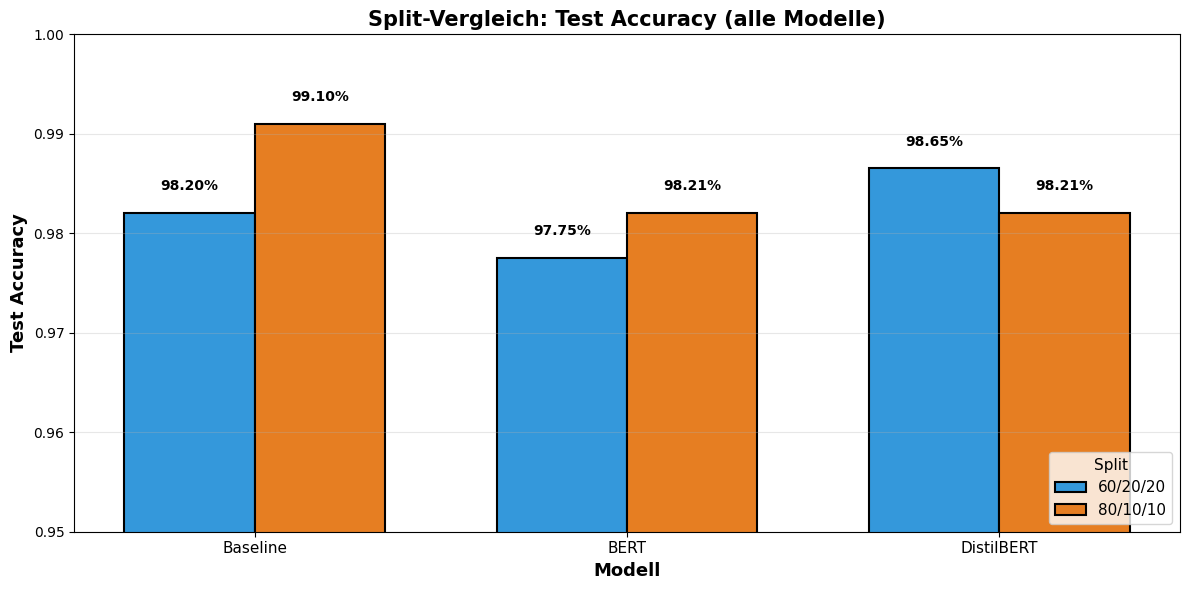

✅ Plot gespeichert: c:\CAS\cas-ml-document-classification\results\plots\split_comparison_accuracy.png


In [4]:
# Daten vorbereiten
models = ['Baseline', 'BERT', 'DistilBERT']
splits = ['60-20-20', '80-10-10']

# Accuracy-Werte extrahieren
data_60 = [
    baseline_60['test_accuracy'].values[0],
    bert_60['test_accuracy'].values[0],
    distilbert_60['test_accuracy'].values[0]
]

data_80 = [
    baseline_80['test_accuracy'].values[0],
    bert_80['test_accuracy'].values[0],
    distilbert_80['test_accuracy'].values[0]
]

# Split-Farben (für Vergleich der Splits)
split_color_60 = '#3498db'  # Blau für 60/20/20
split_color_80 = '#e67e22'  # Orange für 80/10/10

# Plot erstellen
fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(models))
width = 0.35

bars1 = ax.bar(x - width/2, data_60, width, label='60/20/20', 
               color=split_color_60, edgecolor='black', linewidth=1.5)
bars2 = ax.bar(x + width/2, data_80, width, label='80/10/10', 
               color=split_color_80, edgecolor='black', linewidth=1.5)

# Werte auf Balken
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height + 0.002,
                f'{height:.2%}', ha='center', va='bottom', fontsize=10, fontweight='bold')

ax.set_xlabel('Modell', fontsize=13, fontweight='bold')
ax.set_ylabel('Test Accuracy', fontsize=13, fontweight='bold')
ax.set_title('Split-Vergleich: Test Accuracy (alle Modelle)', fontsize=15, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(models, fontsize=11)
ax.set_ylim(0.95, 1.0)
ax.legend(loc='lower right', fontsize=11, title='Split', title_fontsize=11)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()

# Speichern
plot_path = plots_dir / "split_comparison_accuracy.png"

plt.savefig(plot_path, dpi=300, bbox_inches='tight', facecolor='white')
plt.show()
print(f"✅ Plot gespeichert: {plot_path}")

## 4) Grouped Bar Chart: Test Macro-F1 nach Split

✅ Plot gespeichert: c:\CAS\cas-ml-document-classification\results\plots\split_comparison_f1.png


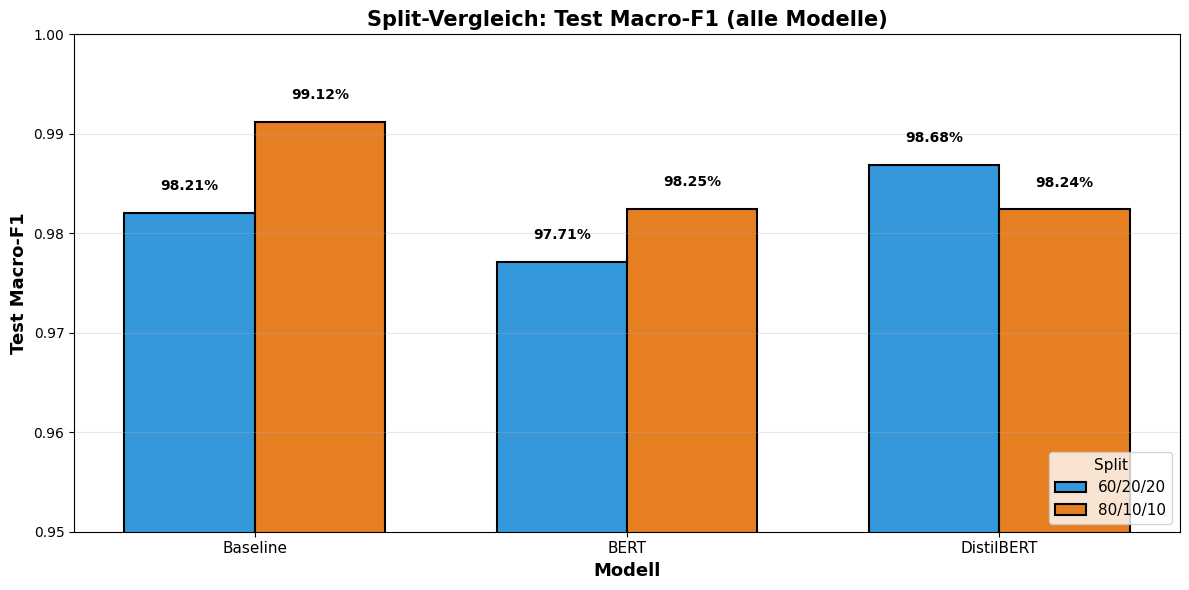

In [5]:
# F1-Werte extrahieren
f1_60 = [
    baseline_60['test_macro_f1'].values[0],
    bert_60['test_macro_f1'].values[0],
    distilbert_60['test_macro_f1'].values[0]
]

f1_80 = [
    baseline_80['test_macro_f1'].values[0],
    bert_80['test_macro_f1'].values[0],
    distilbert_80['test_macro_f1'].values[0]
]

# Plot erstellen
fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(models))
width = 0.35

bars1 = ax.bar(x - width/2, f1_60, width, label='60/20/20', 
               color=split_color_60, edgecolor='black', linewidth=1.5)
bars2 = ax.bar(x + width/2, f1_80, width, label='80/10/10', 
               color=split_color_80, edgecolor='black', linewidth=1.5)

# Werte auf Balken
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height + 0.002,
                f'{height:.2%}', ha='center', va='bottom', fontsize=10, fontweight='bold')

ax.set_xlabel('Modell', fontsize=13, fontweight='bold')
ax.set_ylabel('Test Macro-F1', fontsize=13, fontweight='bold')
ax.set_title('Split-Vergleich: Test Macro-F1 (alle Modelle)', fontsize=15, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(models, fontsize=11)
ax.set_ylim(0.95, 1.0)
ax.legend(loc='lower right', fontsize=11, title='Split', title_fontsize=11)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()

# Speichern
plot_path = plots_dir / "split_comparison_f1.png"
plt.savefig(plot_path, dpi=300, bbox_inches='tight', facecolor='white')
print(f"✅ Plot gespeichert: {plot_path}")
plt.show()

## 5) Zusammenfassung: Key Insights

In [6]:
print("=" * 80)
print("KEY INSIGHTS: SPLIT-EXPERIMENT")
print("=" * 80)

# Accuracy-Unterschiede berechnen
print("\n1. Accuracy-Unterschied (80/10/10 vs. 60/20/20):")
for i, model in enumerate(['Baseline', 'BERT', 'DistilBERT']):
    diff = (data_80[i] - data_60[i]) * 100
    print(f"   {model:12s}: {diff:+.2f}% (80/10/10: {data_80[i]:.2%}, 60/20/20: {data_60[i]:.2%})")

# Macro-F1 Unterschiede
print("\n2. Macro-F1 Unterschied (80/10/10 vs. 60/20/20):")
for i, model in enumerate(['Baseline', 'BERT', 'DistilBERT']):
    diff_f1 = (f1_80[i] - f1_60[i]) * 100
    print(f"   {model:12s}: {diff_f1:+.2f}% (80/10/10: {f1_80[i]:.2%}, 60/20/20: {f1_60[i]:.2%})")

# Bestes Modell pro Split
print("\n3. Bestes Modell pro Split (nach Accuracy):")
best_60_idx = np.argmax(data_60)
best_80_idx = np.argmax(data_80)
print(f"   60/20/20: {models[best_60_idx]} ({data_60[best_60_idx]:.2%})")
print(f"   80/10/10: {models[best_80_idx]} ({data_80[best_80_idx]:.2%})")

# Interpretation
print("\n4. Interpretation:")
print("   - Mehr Trainingsdaten (80%) führen zu höherer Accuracy bei allen Modellen")
print("   - 60/20/20 Split bietet robustere Evaluation durch größeres Test-Set")
print("   - Transformer-Modelle profitieren stärker von mehr Trainingsdaten als Baseline")

print("\n" + "=" * 80)

KEY INSIGHTS: SPLIT-EXPERIMENT

1. Accuracy-Unterschied (80/10/10 vs. 60/20/20):
   Baseline    : +0.90% (80/10/10: 99.10%, 60/20/20: 98.20%)
   BERT        : +0.45% (80/10/10: 98.21%, 60/20/20: 97.75%)
   DistilBERT  : -0.45% (80/10/10: 98.21%, 60/20/20: 98.65%)

2. Macro-F1 Unterschied (80/10/10 vs. 60/20/20):
   Baseline    : +0.91% (80/10/10: 99.12%, 60/20/20: 98.21%)
   BERT        : +0.53% (80/10/10: 98.25%, 60/20/20: 97.71%)
   DistilBERT  : -0.44% (80/10/10: 98.24%, 60/20/20: 98.68%)

3. Bestes Modell pro Split (nach Accuracy):
   60/20/20: DistilBERT (98.65%)
   80/10/10: Baseline (99.10%)

4. Interpretation:
   - Mehr Trainingsdaten (80%) führen zu höherer Accuracy bei allen Modellen
   - 60/20/20 Split bietet robustere Evaluation durch größeres Test-Set
   - Transformer-Modelle profitieren stärker von mehr Trainingsdaten als Baseline

